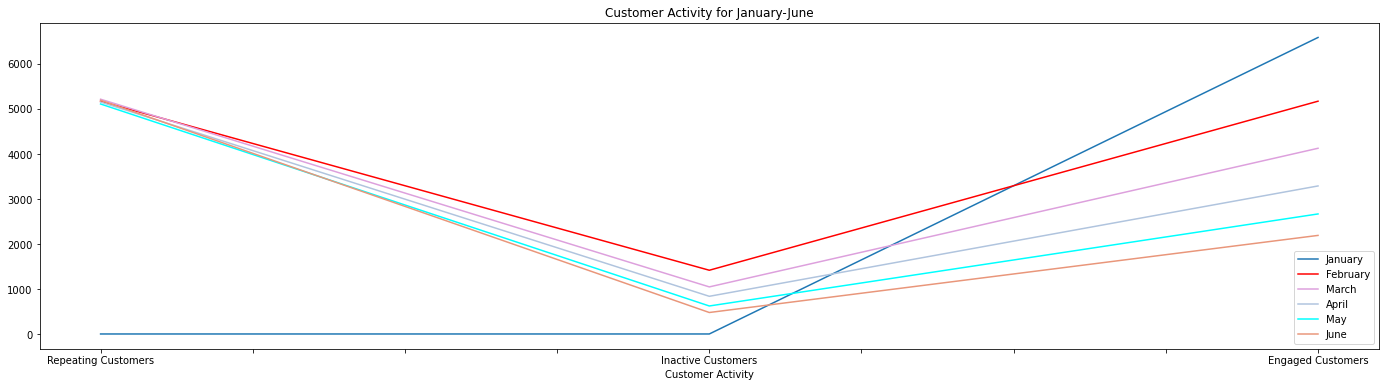

In [3]:
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


#Load json file as dataframe
with open("transaction-data-adhoc-analysis (1).json") as g:
    data=pd.read_json(g)
    df=pd.DataFrame.from_dict(data)
    
#BUYER ACTIVITY

def WhatMonth(transaction_date):
    monthnum=transaction_date.split("/")[1]
    return int(monthnum)
df["what_month"]=df["transaction_date"].apply(WhatMonth)

#List purchases as counts
user_activity_df=df.copy()
def jnry(x):
    if x==1:
        return 1
    else:
        return 0
user_activity_df["January"]=user_activity_df["what_month"].apply(jnry)

def fbrry(x):
    if x == 2:
        return 1
    else:
        return 0
user_activity_df["February"]=user_activity_df["what_month"].apply(fbrry)

def mrch(x):
    if x == 3:
        return 1
    else:
        return 0
user_activity_df["March"]=user_activity_df["what_month"].apply(mrch)

def apr(x):
    if x == 4:
        return 1
    else:
        return 0
user_activity_df["April"]=user_activity_df["what_month"].apply(apr)

def may(x):
    if x == 5:
        return 1
    else:
        return 0
user_activity_df["May"]=user_activity_df["what_month"].apply(may)

def june(x):
    if x == 6:
        return 1
    else:
        return 0
user_activity_df["June"]=user_activity_df["what_month"].apply(june)

jnry=user_activity_df.loc[:, user_activity_df.columns.drop(["February", "March", "April", "May", "June"])]
fbrry=user_activity_df.loc[:, user_activity_df.columns.drop(["January", "March", "April", "May", "June"])]
mrch=user_activity_df.loc[:, user_activity_df.columns.drop(["January","February", "April", "May", "June"])]
apr=user_activity_df.loc[:, user_activity_df.columns.drop(["January","February", "March", "May", "June"])]
may=user_activity_df.loc[:, user_activity_df.columns.drop(["January","February", "March", "April", "June"])]
june=user_activity_df.loc[:, user_activity_df.columns.drop(["January","February", "March", "April", "May"])]

names_of_buyers=user_activity_df["name"].unique()
buyerslist=list()

buyers_table=pd.DataFrame(buyerslist,columns=["name"])

#Remove duplicate
jnry=jnry.drop_duplicates()
fbrry=fbrry.drop_duplicates()
mrch=mrch.drop_duplicates()
apr=apr.drop_duplicates()
may=may.drop_duplicates()
june=june.drop_duplicates()

#Removes rows with 0 purchase for a month
jnry=jnry[jnry["what_month"]==1]
fbrry=fbrry[fbrry["what_month"]==2]
mrch=mrch[mrch["what_month"]==3]
apr=apr[apr["what_month"]==4]
may=may[may["what_month"]==5]
june=june[june["what_month"]==6]

months_list=[jnry,fbrry,mrch,apr,may,june]

#Checking data per month
for name in names_of_buyers:
    customers=list()
    if name in list(jnry["name"]):
        customers.append(1)
    if name in list(fbrry["name"]):
        customers.append(2)
    if name in list(mrch["name"]):
        customers.append(3)
    if name in list(apr["name"]):
        customers.append(4)
    if name in list(may["name"]):
        customers.append(5)
    if name in list(june["name"]):
        customers.append(6)
    buyerslist.append(customers)
buyers_table["Months"]=buyerslist

#repeater costumers
rep_jnry= 0
rep_fbrry= 0
rep_mrch= 0
rep_apr = 0
rep_may = 0
rep_june = 0
for r in buyers_table["Months"]:
    if 1 in r:
        if 2 in r:
            rep_fbrry=rep_fbrry+1
    if 2 in r:
        if 3 in r:
            rep_mrch=rep_mrch+1
    if 3 in r:
        if 4 in r:
            rep_apr=rep_apr+1
    if 4 in r:
        if 5 in r:
            rep_may=rep_may+1
    if 5 in r:
        if 6 in r:
            rep_june=rep_june+1
            
#inactive customers
ina_jnry= 0
ina_fbrry= 0
ina_mrch= 0
ina_apr = 0
ina_may = 0
ina_june = 0
for i in buyers_table["Months"]:
    if 1 in i:
        if 2 not in i:
            ina_fbrry=ina_fbrry+1
        elif 2 in i:
            if 3 not in i:
                ina_mrch=ina_mrch+1
            elif 3 in i:
                if 4 not in i:
                    ina_apr=ina_apr+1
                elif 4 in i:
                    if 5 not in i:
                        ina_may=ina_may+1
                    elif 5 in i:
                        if 6 not in i:
                            ina_june=ina_june+1
                            
#engaged customers
eng_jnry = 0
eng_fbrry= 0
eng_mrch= 0
eng_apr = 0
eng_may = 0
eng_june = 0
for e in buyers_table["Months"]:
    if 1 in e:
        eng_jnry=eng_jnry+1
        if 2 in e:
                eng_fbrry=eng_fbrry+1
                if 3 in e:
                    eng_mrch=eng_mrch+1
                    if 4 in e:
                        eng_apr=eng_apr+1
                        if 5 in e:
                            eng_may=eng_may+1
                            if 6 in e:
                                eng_june=eng_june+1
                                
#Final data
BuyerActivityData={"Customer Activity":["Repeating Customers","Inactive Customers","Engaged Customers"],"January":[rep_jnry,ina_jnry,eng_jnry],"February":[rep_fbrry,ina_fbrry,eng_fbrry],"March":[rep_mrch,ina_mrch,eng_mrch],"April":[rep_apr,ina_apr,eng_apr], "May":[rep_may,ina_may,eng_may], "June":[rep_june,ina_june,eng_june]}
BuyerActivity=pd.DataFrame(BuyerActivityData)
BuyerActivity

#Graph
fig = plt.figure() 
fig.set_size_inches(24, 6)

ax = plt.gca()
BuyerActivity.plot(kind="line",x="Customer Activity",y="January",ax=ax)
BuyerActivity.plot(kind="line",x="Customer Activity",y="February", color="red", ax=ax)
BuyerActivity.plot(kind="line",x="Customer Activity",y="March",color="plum",ax=ax)
BuyerActivity.plot(kind="line",x="Customer Activity",y="April",color="lightsteelblue",ax=ax)
BuyerActivity.plot(kind="line",x="Customer Activity",y="May",color="aqua",ax=ax)
BuyerActivity.plot(kind="line",x="Customer Activity",y="June",color="darksalmon",ax=ax)

plt.title("Customer Activity for January-June")
plt.show()